In [182]:
import csv
import copy
import os
import numpy as np
import matplotlib.pyplot as plt

In [183]:
# プロットする手法・モデル・データセットを指定
dir_path = './../results/SL/mobilenet_v2_cifar10/'

date_dir_list = ['2024-07-31/', '2024-08-01/']
data_dir_list = ['accuracy', 'loss']
batch_type_list = ['B128', 'B64']
# data_type_list = ['IID', 'N-IID-ClassSep', 'N-IID-Diri-06', 'N-IID-Diri-03', 'N-IID-Diri-01', 'N-IID-Diri-005']
data_type_list = ['IID', 'N-IID-ClassSep', 'N-IID-Diri-03', 'N-IID-Diri-01', 'N-IID-Diri-005']
epoch_type_list = ['R25_E10', 'R50_E5']

In [184]:
def make_template():
    data_dir_dict = {}
    batch_dict = {}
    epoch_dict = {}
    data_type_dict = {}
    epoch_data_dict = {'accuracy': [], 'loss': []}
    accuracy_dict = {'average': [], 'client1': [], 'client2': []}
    data_dict = {'epoch': epoch_data_dict, 'accuracy': accuracy_dict, 'loss': []}

    # for data_dir in data_dir_list:
    #     data_dir_dict[data_dir] = data_dict
    for data_type in data_type_list:
        data_type_dict[data_type] = data_dict
    for epoch_type in epoch_type_list:
        epoch_dict[epoch_type] = copy.deepcopy(data_type_dict)
    for batch_type in batch_type_list:
        batch_dict[batch_type] = copy.deepcopy(epoch_dict)

    return batch_dict

In [185]:
def input_to_dict(batch_dict):

    for batch_type, epoch_dict in batch_dict.items():

        for epoch_type, data_type_dict in epoch_dict.items():

            for data_type, _ in data_type_dict.items():

                epoch_data_dict = {'accuracy': [], 'loss': []}
                accuracy_dict = {'average': [], 'client1': [], 'client2': []}
                data_dict = {'epoch': epoch_data_dict, 'accuracy': accuracy_dict, 'loss': []}

                for date_dir in date_dir_list:
                    for data_name in data_dir_list:
                        

                        file_path = dir_path + date_dir + data_name + '/' + data_type + '_' + batch_type + '_' + epoch_type + '_' + data_name + '.csv'
                        if os.path.isfile(file_path) == True:
                            with open(file_path) as f:
                                csv_reader = csv.reader(f, delimiter=',')
                                for i, row in enumerate(csv_reader):
                                    if i == 0:
                                        continue
                                    else:
                                        data_dict['epoch'][data_name].append(float(row[0]))
                                        if data_name == 'accuracy':
                                            data_dict[data_name]['average'].append(float(row[1]))
                                            data_dict[data_name]['client1'].append(float(row[2]))
                                            data_dict[data_name]['client2'].append(float(row[3]))
                                        elif data_name == 'loss':
                                            data_dict[data_name].append(float(row[1]))
                            if data_name == 'accuracy':
                                if len(data_dict['epoch'][data_name]) == 25:
                                    data_dict['epoch'][data_name] = [ x * 10 for x in data_dict['epoch'][data_name]]
                                elif len(data_dict['epoch'][data_name]) == 50:
                                    data_dict['epoch'][data_name] = [ x * 5 for x in data_dict['epoch'][data_name]]
                            elif data_name == 'loss':
                                if len(data_dict[data_name]) == 500:
                                    data_dict[data_name] = data_dict[data_name][0::2]
                                elif len(data_dict[data_name]) == 1000:
                                    data_dict[data_name] = data_dict[data_name][0::4]
                                data_dict['epoch'][data_name] = np.arange(1, len(data_dict[data_name])+1)
                    batch_dict[batch_type][epoch_type][data_type] = data_dict

    return batch_dict
                            

In [186]:
batch_dict = make_template()
batch_dict = input_to_dict(batch_dict)

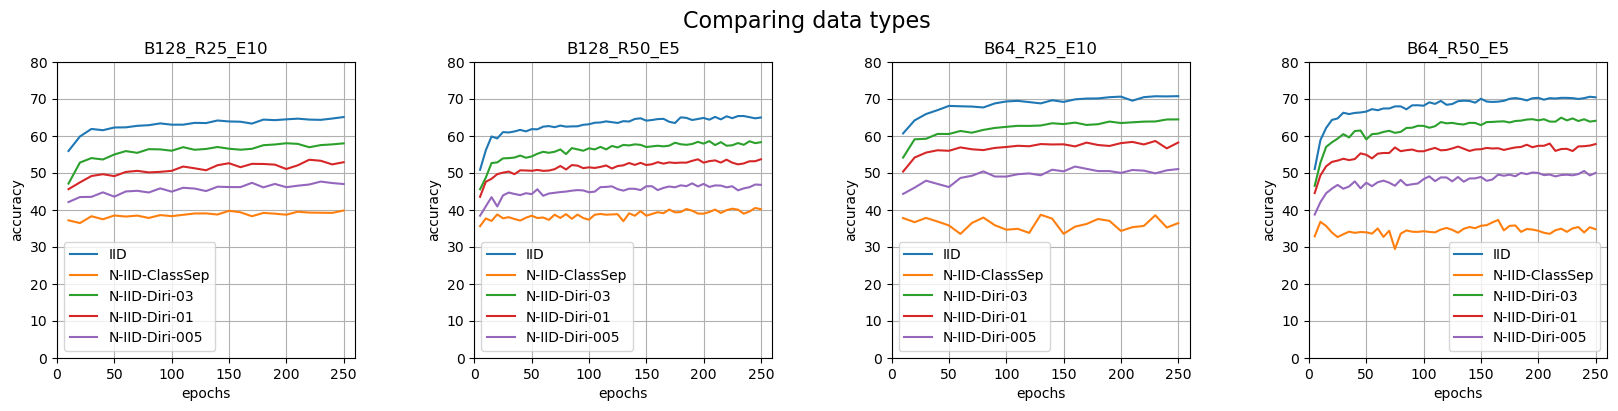

In [187]:
pattern = len(batch_type_list) * len(epoch_type_list)
fig, axes = plt.subplots(1, pattern, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

plot_accuracy_type = 'average'

for i, batch_type in enumerate(batch_type_list):
    for j, epoch_type in enumerate(epoch_type_list):

        ax = axes[j+i*2]
        for data_type in data_type_list:
            if len(batch_dict[batch_type][epoch_type][data_type]['loss']) != 0:
                epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']['accuracy']
                accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy'][plot_accuracy_type]
                ax.plot(epoch, accuracy, label=data_type)

        ax.set_title(batch_type + '_' + epoch_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing data types', fontsize=16)
plt.show()
            

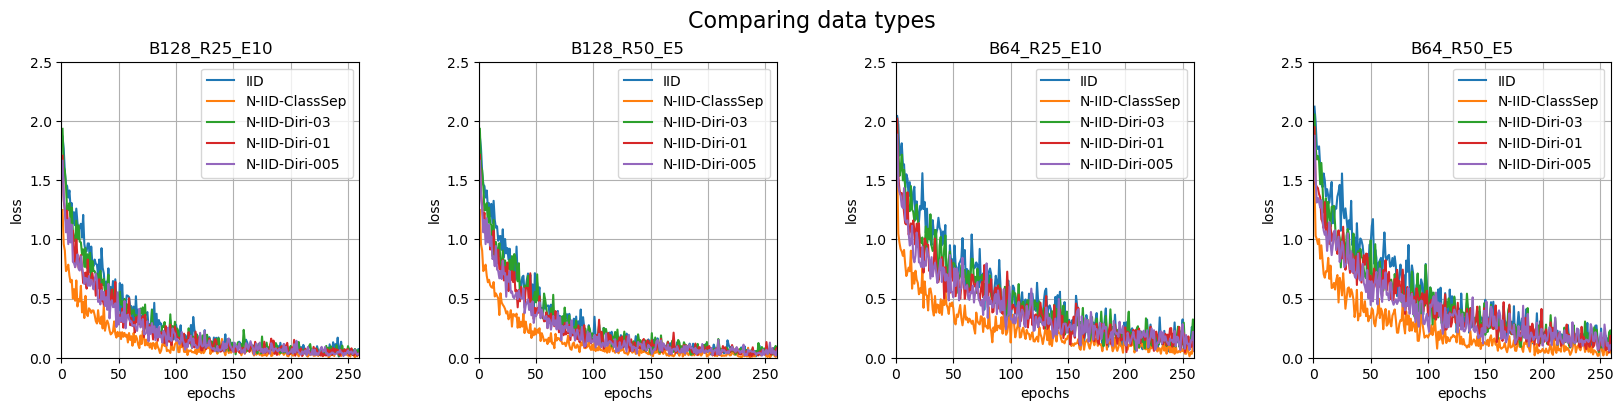

In [188]:
pattern = len(batch_type_list) * len(epoch_type_list)
fig, axes = plt.subplots(1, pattern, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)


for i, batch_type in enumerate(batch_type_list):
    for j, epoch_type in enumerate(epoch_type_list):

        ax = axes[j+i*2]
        for data_type in data_type_list:
            if len(batch_dict[batch_type][epoch_type][data_type]['loss']) != 0:
                epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']['loss']
                loss = batch_dict[batch_type][epoch_type][data_type]['loss']
                ax.plot(epoch, loss, label=data_type)

        ax.set_title(batch_type + '_' + epoch_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_ylim((0, 2.5))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing data types', fontsize=16)
plt.show()
            

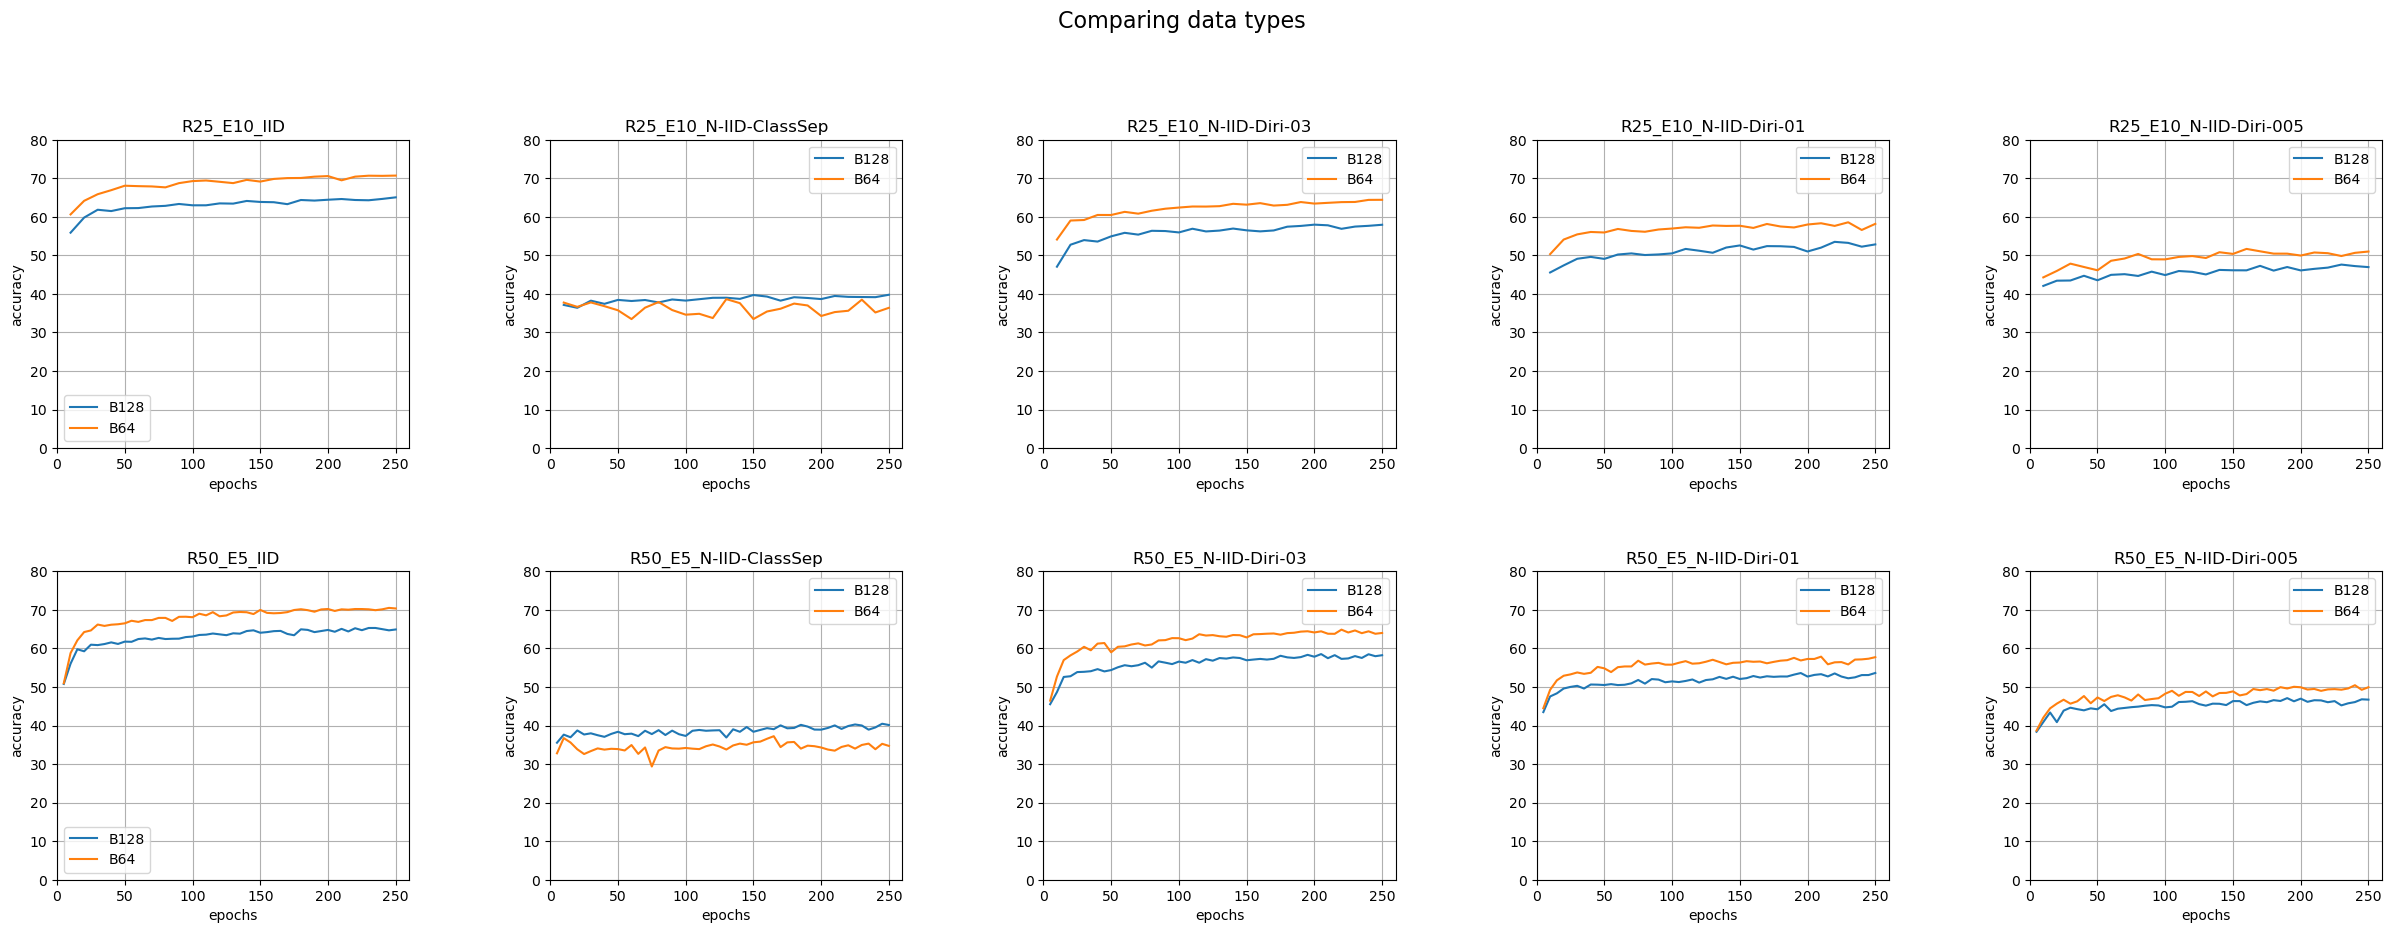

In [193]:
pattern = len(data_type_list) * len(epoch_type_list)
fig, axes = plt.subplots(2, 5, figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

plot_accuracy_type = 'average'

for i, epoch_type in enumerate(epoch_type_list):
    for j, data_type in enumerate(data_type_list):

        ax = axes[i, j]
        for batch_type in batch_type_list:
            if len(batch_dict[batch_type][epoch_type][data_type]['loss']) != 0:
                epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']['accuracy']
                accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy'][plot_accuracy_type]
                ax.plot(epoch, accuracy, label=batch_type)

        ax.set_title(epoch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing data types', fontsize=16)
plt.show()
            

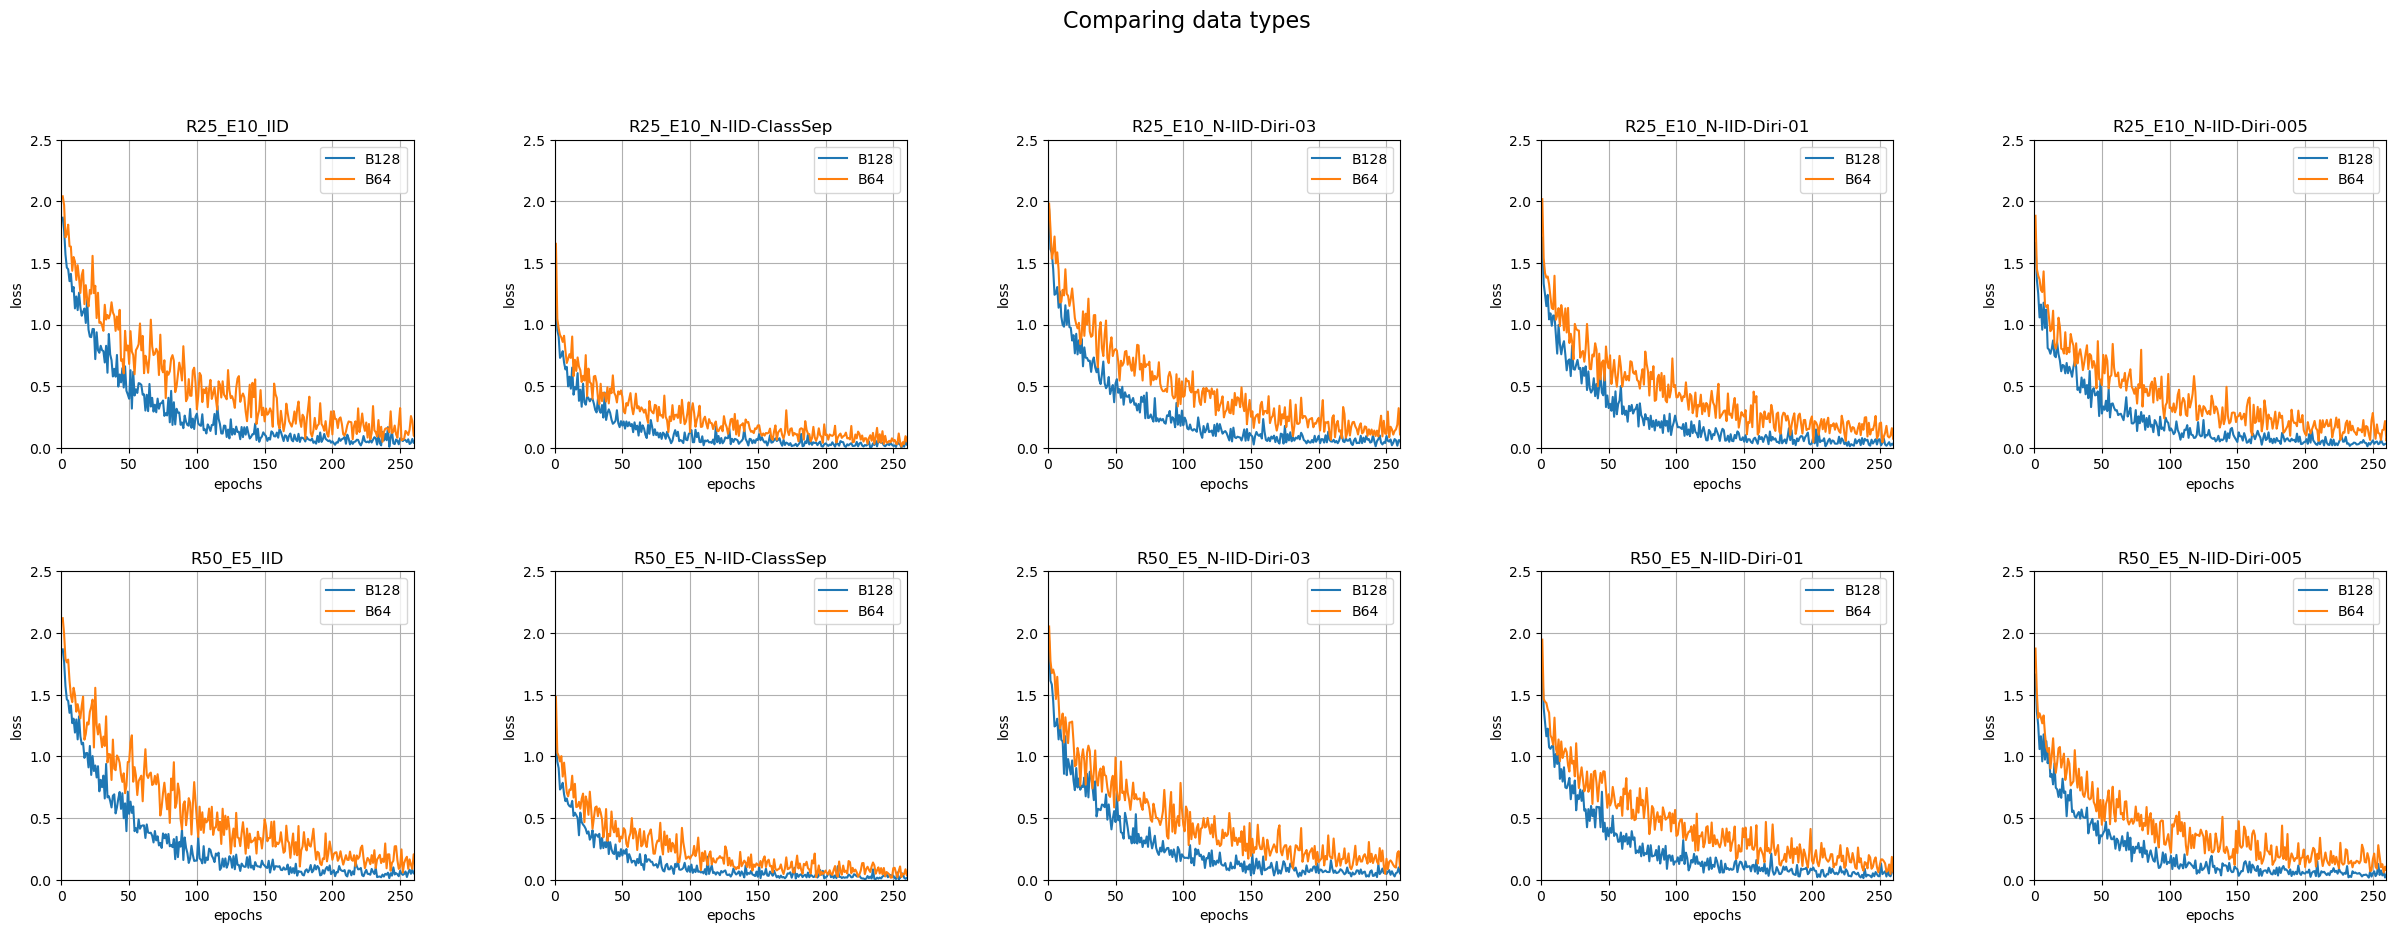

In [196]:
fig, axes = plt.subplots(2, 5, figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

for i, epoch_type in enumerate(epoch_type_list):
    for j, data_type in enumerate(data_type_list):

        ax = axes[i, j]
        for batch_type in batch_type_list:
            if len(batch_dict[batch_type][epoch_type][data_type]['loss']) != 0:
                epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']['loss']
                loss = batch_dict[batch_type][epoch_type][data_type]['loss']
                ax.plot(epoch, loss, label=batch_type)

        ax.set_title(epoch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_ylim((0, 2.5))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing data types', fontsize=16)
plt.show()
            